In [2]:
import numpy as np

数据采集

In [22]:
# 在[-π, π]上采样100个点
x = np.linspace(-np.pi, np.pi, 100)
train_data = x 
# 将输出数据转换为二维
train_data = train_data.reshape(-1, 1)
# 生成标签
train_label = np.sin(train_data)

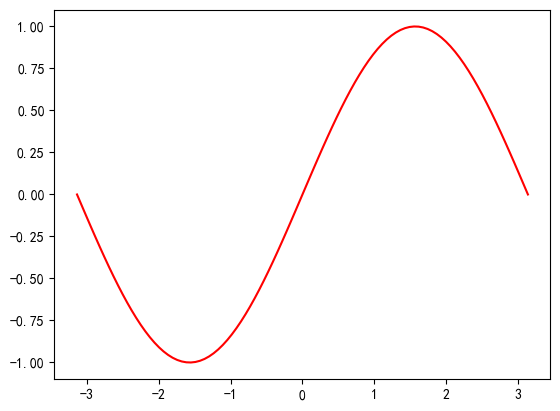

In [40]:
import matplotlib.pyplot as plt
# 设置字体为 SimHei（黑体）
plt.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

plt.plot(train_data, train_label, 'r')

In [62]:
class Matmul:
    def __init__(self):
        self.mem = {}
        
    def forward(self, x, W):
        # h2输入：h1_relu
        # h2输出：h2
        h = np.matmul(x, W)
        self.mem={'x': x, 'W':W}
        return h
    
    def backward(self, grad_y):
        '''
        x: shape(N, d)
        w: shape(d, d')
        grad_y: shape(N, d')
        '''
        # h2输入：h2_soft_grad,是损失函数对h2的梯度
        # h2输出：h2_grad,是损失函数对h1_relu的梯度
        #         w2_grad,是损失函数对W2的梯度
        x = self.mem['x']
        W = self.mem['W']
        
        grad_x = np.matmul(grad_y, W.T) # grad_x: shape(N, d)
        grad_W = np.matmul(x.T, grad_y) / x.shape[0]

        return grad_x, grad_W

class Relu:
    def __init__(self):
        self.mem = {}
        
    def forward(self, x): # x : 上一层的输出a(l-1)
        # ReLU输入x: h1
        # ReLU输出：h1_relu
        self.mem['x'] = x
        return np.where(x > 0, x, 0) 
    
    def backward(self, grad_y): # grad_y : 下一层的净输入z(l+1)的梯度
        '''
        grad_y: same shape as x
        '''
        ####################
        '''计算relu 激活函数对应的梯度'''
        ####################
        # 输入：h2_grad，是损失函数对h1_relu的梯度
        # 输出：h1_grad，是损失函数对h1的梯度
        x = self.mem['x']
        grad_x = np.where(x > 0, grad_y, 0)
        
        return grad_x

class regressionModel:
    def __init__(self, input_dims=1):

        self.input_dims = input_dims
        hidden_dim = 1000
        self.W1 = np.random.normal(0, 0.3, size=[input_dims + 1, hidden_dim])
        self.W2 = np.random.normal(0, 0.3,size=[hidden_dim, 1])

        self.mul_h1 = Matmul()
        self.mul_h2 = Matmul()
        self.relu = Relu()
        
    def forward(self, x):
        bias = np.ones(shape=[x.shape[0], 1])
        x = np.concatenate([x, bias], axis=1)
        
        self.h1 = self.mul_h1.forward(x, self.W1) 
        self.h1_relu = self.relu.forward(self.h1)
        self.h2 = self.mul_h2.forward(self.h1_relu, self.W2)

    def backward(self, label):
        self.grad = self.h2 - label  # (N, 1) MSE损失函数 对h2的梯度
        self.h2_grad, self.W2_grad = self.mul_h2.backward(self.grad) # 对h1_relu和W2的梯度
        self.h1_relu_grad = self.relu.backward(self.h2_grad)  # 对h1的梯度
        self.h1_grad, self.W1_grad = self.mul_h1.backward(self.h1_relu_grad) # 对x和W1的梯度

Epoch 0, Loss: 2.6048
Epoch 1, Loss: 2.6002
Epoch 2, Loss: 2.5957
Epoch 3, Loss: 2.5911
Epoch 4, Loss: 2.5866
Epoch 5, Loss: 2.5820
Epoch 6, Loss: 2.5775
Epoch 7, Loss: 2.5730
Epoch 8, Loss: 2.5684
Epoch 9, Loss: 2.5639
Epoch 10, Loss: 2.5594
Epoch 11, Loss: 2.5549
Epoch 12, Loss: 2.5505
Epoch 13, Loss: 2.5460
Epoch 14, Loss: 2.5415
Epoch 15, Loss: 2.5371
Epoch 16, Loss: 2.5326
Epoch 17, Loss: 2.5282
Epoch 18, Loss: 2.5238
Epoch 19, Loss: 2.5193
Epoch 20, Loss: 2.5149
Epoch 21, Loss: 2.5105
Epoch 22, Loss: 2.5061
Epoch 23, Loss: 2.5017
Epoch 24, Loss: 2.4974
Epoch 25, Loss: 2.4930
Epoch 26, Loss: 2.4886
Epoch 27, Loss: 2.4843
Epoch 28, Loss: 2.4799
Epoch 29, Loss: 2.4756
Epoch 30, Loss: 2.4713
Epoch 31, Loss: 2.4669
Epoch 32, Loss: 2.4626
Epoch 33, Loss: 2.4583
Epoch 34, Loss: 2.4540
Epoch 35, Loss: 2.4497
Epoch 36, Loss: 2.4455
Epoch 37, Loss: 2.4412
Epoch 38, Loss: 2.4369
Epoch 39, Loss: 2.4327
Epoch 40, Loss: 2.4284
Epoch 41, Loss: 2.4242
Epoch 42, Loss: 2.4199
Epoch 43, Loss: 2.415

Text(0, 0.5, '值')

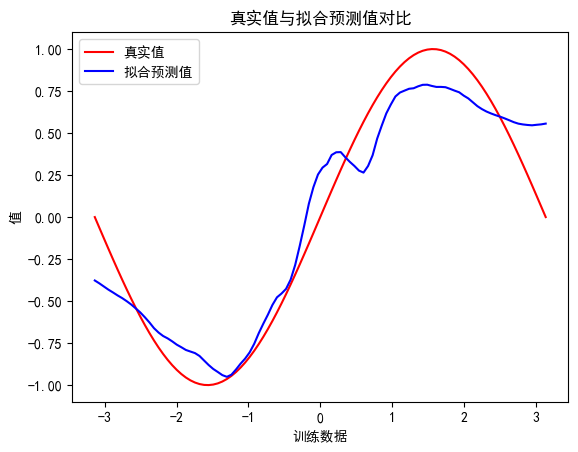

In [63]:
def compute_loss(pred, target):
    # RMSE 均方根误差
    return np.sqrt(np.mean((pred - target)**2))
    
def compute_accuracy(pred, target):
    # MAE平均绝对误差(MAE)，MAE越小，预测精度越高
    return np.mean(np.abs(pred - target))

def train_one_step(model, x, y):
    model.forward(x)
    model.backward(y)
    learning_rate = 1e-5  # 调整学习率
    model.W1 -= learning_rate * model.W1_grad
    model.W2 -= learning_rate * model.W2_grad
    loss = compute_loss(model.h2, y)
    accuracy = compute_accuracy(model.h2, y)
    return loss, accuracy

def test(model, x, y):
    model.forward(x)
    loss = compute_loss(model.h2, y)
    accuracy = compute_accuracy(model.h2, y)
    return loss, accuracy

model = regressionModel()
for epoch in range(32000):
    loss, accuracy = train_one_step(model, train_data, train_label)
    print(f"Epoch {epoch}, Loss: {loss:.4f}")
loss, accuracy = test(model, train_data, train_label)

print(f"test loss {loss:.4f}")
predictions = model.h2
predictions = predictions.flatten()
plt.plot(train_data,train_label, 'r', label='真实值')
plt.plot(train_data,predictions, 'b', label='拟合预测值')
# 添加图例
plt.legend()

# 添加标题和轴标签
plt.title('真实值与拟合预测值对比')
plt.xlabel('训练数据')
plt.ylabel('值')